# AI-Powered Business Performance Intelligence Suite project

# Project Scope Breakdown
## We’ll build a dashboard and backend system that includes:
## Sales, Marketing, and Financial KPIs tracking
## ML-based Forecasting (e.g., revenue, customer churn)
## Anomaly detection in business metrics
## Customer segmentation and behavior analysis
## AI-powered recommendations (e.g., cost-saving, marketing optimization)
## Visualized with Tableau, integrated with backend (Python, Pandas, Scikit-learn)

In [142]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Interactive plots
import plotly.express as px
import plotly.graph_objects as go

# For date handling
from datetime import datetime

# Load dataset
df = pd.read_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\Buisiness inteligense suite\Data\Superstore.csv",encoding='ISO-8859-1')

# Preview data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [143]:
# Dataset shape and basic info
print(f"Dataset shape: {df.shape}")
df.info()


Dataset shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-nu

In [144]:
# Null values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")


Missing values:
 Series([], dtype: int64)
Duplicate rows: 0


Basic EDA


In [145]:
# Convert Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create month-year column
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Sales by Month
sales_monthly = df.groupby('Order Month')['Sales'].sum().reset_index()

fig = px.line(sales_monthly, x='Order Month', y='Sales',
              title='📈 Monthly Sales Trend',
              markers=True)
fig.update_layout(xaxis_title='Month', yaxis_title='Sales ($)', template='plotly_white')
fig.show()


Feature Engeniering

In [146]:
# Profit margin = Profit / Sales
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100
df['Profit Margin (%)'] = df['Profit Margin (%)'].round(2)

df[['Sales', 'Profit', 'Profit Margin (%)']].head()


,Sales,Profit,Profit Margin (%)
0,261.9600,41.9136,16.00
1,731.9400,219.5820,30.00
2,14.6200,6.8714,47.00
3,957.5775,-383.0310,-40.00
4,22.3680,2.5164,11.25


Segment based Overview

In [147]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

fig = px.bar(segment_sales, x='Segment', y='Sales', color='Segment',
             title='💼 Sales by Customer Segment',
             text_auto='.2s', template='plotly_white')
fig.show()


# Advanced EDA + Data Cleaning

profit and sales by category/sub category

In [148]:
# Grouping
category_profit = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Treemap
fig = px.treemap(category_profit, path=['Category', 'Sub-Category'],
                 values='Sales',
                 color='Profit',
                 color_continuous_scale='RdBu',
                 title='🧭 Sales & Profit by Category/Sub-Category')
fig.show()


In [149]:
#save the sales data to a csv file
#category_profit.to_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\category_profit.csv", index=False)

Regional sales distribution

In [150]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Profit Margin (%)'],
      dtype='object')

In [151]:
# Mapping full names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add a new column with state codes
df['state_code'] = df['State'].map(us_state_abbrev)

# Group sales by state code
state_sales = df.groupby(['state_code'])['Sales'].sum().reset_index()

# Replot the choropleth map
fig = px.choropleth(state_sales,
                    locations='state_code',
                    locationmode='USA-states',
                    color='Sales',
                    scope='usa',
                    title='🌎 Sales Distribution Across States',
                    color_continuous_scale='Viridis')
fig.show()




In [152]:
#save the region sales data to a CSV file
#state_sales.to_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\state_sales.csv", index=False)

In [153]:
df['State']

0         Kentucky
1         Kentucky
2       California
3          Florida
4          Florida
           ...    
9989       Florida
9990    California
9991    California
9992    California
9993    California
Name: State, Length: 9994, dtype: object

Data cleaning for project scope

In [154]:
# Clean column names (optional standardization)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with critical nulls (if any)
df.dropna(subset=['order_date', 'sales', 'profit'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Final check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   row_id             9994 non-null   int64         
 1   order_id           9994 non-null   object        
 2   order_date         9994 non-null   datetime64[ns]
 3   ship_date          9994 non-null   object        
 4   ship_mode          9994 non-null   object        
 5   customer_id        9994 non-null   object        
 6   customer_name      9994 non-null   object        
 7   segment            9994 non-null   object        
 8   country            9994 non-null   object        
 9   city               9994 non-null   object        
 10  state              9994 non-null   object        
 11  postal_code        9994 non-null   int64         
 12  region             9994 non-null   object        
 13  product_id         9994 non-null   object        
 14  category

In [155]:
# Save the cleaned version
#df.to_csv("cleaned_superstore_data.csv", index=False)
print("✅ Cleaned dataset exported as 'cleaned_superstore_data.csv'")


✅ Cleaned dataset exported as 'cleaned_superstore_data.csv'


# Business KPI Computation

Monthly KPIs: Sales, Profit, Quantity, Orders

In [156]:
# Ensure datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)

# KPI Aggregation
monthly_kpis = df.groupby('order_month').agg({
    'sales': 'sum',
    'profit': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).reset_index().rename(columns={
    'order_id': 'num_orders'
})

# Profit Margin
monthly_kpis['profit_margin_%'] = (monthly_kpis['profit'] / monthly_kpis['sales']) * 100
monthly_kpis['profit_margin_%'] = monthly_kpis['profit_margin_%'].round(2)

monthly_kpis.tail()


,order_month,sales,profit,quantity,num_orders,profit_margin_%
43,2017-08,63120.8880,9040.9557,884,111,14.32
44,2017-09,87866.6520,10991.5556,1660,226,12.51
45,2017-10,77776.9232,9275.2755,1133,147,11.93
46,2017-11,118447.8250,9690.1037,1840,261,8.18
47,2017-12,83829.3188,8483.3468,1723,224,10.12


Visualize Monthly Sales & Profit (Dual Axis Plot)

In [157]:
fig = go.Figure()

# Sales line
fig.add_trace(go.Scatter(x=monthly_kpis['order_month'],
                         y=monthly_kpis['sales'],
                         name='Sales',
                         mode='lines+markers',
                         line=dict(color='royalblue')))

# Profit line
fig.add_trace(go.Scatter(x=monthly_kpis['order_month'],
                         y=monthly_kpis['profit'],
                         name='Profit',
                         mode='lines+markers',
                         line=dict(color='green'),
                         yaxis='y2'))

# Layout
fig.update_layout(
    title='📈 Monthly Sales & Profit Trend',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Sales', side='left'),
    yaxis2=dict(title='Profit', overlaying='y', side='right'),
    template='plotly_white'
)

fig.show()


Regional KPIs: Region-Level Sales & Profit


In [158]:
region_kpis = df.groupby('region').agg({
    'sales': 'sum',
    'profit': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index().rename(columns={
    'order_id': 'num_orders',
    'customer_id': 'num_customers'
})

# Profit margin
region_kpis['profit_margin_%'] = (region_kpis['profit'] / region_kpis['sales']) * 100
region_kpis['profit_margin_%'] = region_kpis['profit_margin_%'].round(2)

region_kpis.sort_values(by='sales', ascending=False)


,region,sales,profit,num_orders,num_customers,profit_margin_%
3,West,725457.8245,108418.4489,1611,686,14.94
1,East,678781.2400,91522.7800,1401,674,13.48
0,Central,501239.8908,39706.3625,1175,629,7.92
2,South,391721.9050,46749.4303,822,512,11.93


Visual: Region-wise Sales Breakdown (Bar Chart)

In [159]:
fig = px.bar(region_kpis, x='region', y='sales', color='region',
             title='📊 Sales by Region',
             text_auto='.2s', template='plotly_white')
fig.update_layout(showlegend=False)
fig.show()


Customer KPIs & Behavior Insights

Customer-Level Metrics: CLTV, AOV, Frequency

In [160]:
# Group by customer
customer_kpis = df.groupby('customer_id').agg({
    'sales': 'sum',
    'profit': 'sum',
    'order_id': 'nunique',
    'quantity': 'sum'
}).reset_index()

# Rename
customer_kpis = customer_kpis.rename(columns={
    'sales': 'total_sales',
    'profit': 'total_profit',
    'order_id': 'order_count',
    'quantity': 'total_quantity'
})

# Derive KPIs
customer_kpis['avg_order_value'] = (customer_kpis['total_sales'] / customer_kpis['order_count']).round(2)
customer_kpis['cltv'] = (customer_kpis['avg_order_value'] * customer_kpis['order_count']).round(2)

customer_kpis.head()


,customer_id,total_sales,total_profit,order_count,total_quantity,avg_order_value,cltv
0,AA-10315,5563.560,-362.8825,5,30,1112.71,5563.55
1,AA-10375,1056.390,277.3824,9,41,117.38,1056.42
2,AA-10480,1790.512,435.8274,4,36,447.63,1790.52
3,AA-10645,5086.935,857.8033,6,64,847.82,5086.92
4,AB-10015,886.156,129.3465,3,13,295.39,886.17


In [161]:
# Top 10 customers by sales
top_10_customers = customer_kpis.nlargest(10, 'total_sales')
fig = px.bar(top_10_customers, x='customer_id', y='total_sales',
             title='🏆 Top 10 Customers by Sales',
             text_auto='.2s', template='plotly_white')
fig.update_layout(showlegend=False)
fig.show()


Churn & Frequency Estimation (Basic Signals)

In [162]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'order_month', 'profit_margin_(%)', 'state_code'],
      dtype='object')

In [163]:
# Most recent order date per customer
latest_order = df.groupby('customer_id')['order_date'].max().reset_index()
latest_order.columns = ['customer_id', 'last_order_date']

# Merge into customer KPIs
customer_kpis = customer_kpis.merge(latest_order, on='customer_id', how='left')

# Reference date for churn calc (e.g., max order date in dataset)
ref_date = df['order_date'].max()

# Days since last order
customer_kpis['days_since_last_order'] = (ref_date - customer_kpis['last_order_date']).dt.days

# Basic churn signal (if >180 days since last order)
customer_kpis['likely_churned'] = customer_kpis['days_since_last_order'] > 180

customer_kpis[['customer_id', 'cltv', 'avg_order_value', 'days_since_last_order', 'likely_churned']].head()
#customer_kpis.head()


,customer_id,cltv,avg_order_value,days_since_last_order,likely_churned
0,AA-10315,5563.55,1112.71,184,True
1,AA-10375,1056.42,117.38,19,False
2,AA-10480,1790.52,447.63,259,True
3,AA-10645,5086.92,847.82,55,False
4,AB-10015,886.17,295.39,415,True


Churn Risk Visualization

In [164]:
# Count of churned vs active
churn_counts = customer_kpis['likely_churned'].value_counts().rename({True: 'Churned', False: 'Active'}).reset_index()
churn_counts.columns = ['status', 'count']

fig = px.pie(churn_counts, names='status', values='count', 
             title='🔁 Customer Churn Risk Distribution',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()


In [165]:
monthly_kpis.head()

,order_month,sales,profit,quantity,num_orders,profit_margin_%
0,2014-01,14236.895,2450.1907,284,32,17.21
1,2014-02,4519.892,862.3084,159,28,19.08
2,2014-03,55691.009,498.7299,585,71,0.90
3,2014-04,28295.345,3488.8352,536,66,12.33
4,2014-05,23648.287,2738.7096,466,69,11.58


In [166]:
# Save monthly & regional KPIs
#monthly_kpis.to_csv("monthly_kpis.csv", index=False)
#region_kpis.to_csv("region_kpis.csv", index=False)
#customer_kpis.to_csv("customer_kpis.csv", index=False)

print("✅ KPI datasets exported for Tableau / ML:")
print("- monthly_kpis.csv")
print("- region_kpis.csv")
print("- customer_kpis.csv")


✅ KPI datasets exported for Tableau / ML:
- monthly_kpis.csv
- region_kpis.csv
- customer_kpis.csv


# Revenue Forecasting (Time Series) machine learning

Predict future monthly revenue using historical sales

Prepare Monthly Revenue Time Series

In [167]:
# Convert to datetime if not already
df['order_date'] = pd.to_datetime(df['order_date'])

# Monthly revenue aggregation
monthly_revenue = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()
monthly_revenue.columns = ['month', 'revenue']
monthly_revenue.head()


C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_6548\3461054863.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,month,revenue
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


In [168]:
fig = px.line(monthly_revenue, x='month', y='revenue',
              title='📉 Monthly Revenue Over Time',
              markers=True, template='plotly_white')

fig.update_layout(xaxis_title='Month', yaxis_title='Revenue ($)')
fig.show()



Time Series Forecasting with Prophet

15:29:02 - cmdstanpy - INFO - Chain [1] start processing
15:29:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Saurav Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



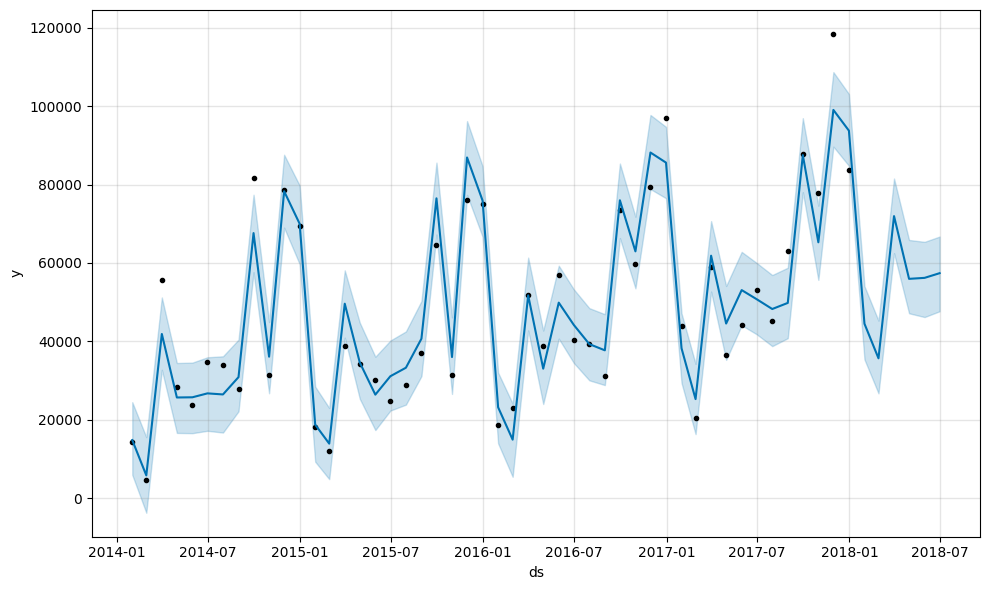

In [169]:
from prophet import Prophet

# Rename columns for Prophet
prophet_df = monthly_revenue.rename(columns={'month': 'ds', 'revenue': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Future dataframe: 6 months ahead
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)


Intercative forecast visualization

In [170]:
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
fig = px.line(forecast_df, x='ds', y='yhat', title='🔮 Forecasted Revenue (Prophet)',
              labels={'ds': 'Date', 'yhat': 'Predicted Revenue'}, template='plotly_white')

fig.add_scatter(x=forecast_df['ds'], y=forecast_df['yhat_upper'], mode='lines',
                line=dict(width=0), name='Upper Bound', showlegend=False)

fig.add_scatter(x=forecast_df['ds'], y=forecast_df['yhat_lower'], mode='lines',
                fill='tonexty', fillcolor='rgba(0,100,80,0.2)',
                line=dict(width=0), name='Lower Bound', showlegend=False)

fig.show()


In [171]:
forecast_df.head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-31,14790.550984,5911.377538,24466.437670
1,2014-02-28,5778.650833,-3764.531614,15541.085453
2,2014-03-31,41875.539248,32725.160800,51194.999070
3,2014-04-30,25662.621287,16615.978673,34462.877554
4,2014-05-31,25711.964323,16552.533125,34563.393446


In [172]:
#save the forecast data with date modified to year-month-day format using .loc[row_indexer,col_indexer] = value and yhat column renamed to revenue
#recast_df.to_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\forecast.csv", index=False)


# Customer Churn Prediction (Binary Classification)

Prepare Labeled Dataset

In [173]:
# Select features
features = ['total_sales', 'total_profit', 'order_count', 'avg_order_value', 'days_since_last_order']
X = customer_kpis[features]
y = customer_kpis['likely_churned']


 Train/Test Split & Scaling

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training a Classifier(Random forest)

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[122   0]
 [  0  37]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       122
        True       1.00      1.00      1.00        37

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



Feature importance plot

In [176]:
importances = model.feature_importances_
feature_names = X.columns

fig = px.bar(x=feature_names, y=importances, title='📌 Churn Prediction Feature Importances',
             labels={'x': 'Feature', 'y': 'Importance'}, template='plotly_white')

fig.show()


In [177]:
# Predict churn on all customers (not just test set)
X_scaled_all = scaler.transform(X[features])
customer_kpis['churn_prediction'] = model.predict(X_scaled_all)
customer_kpis['churn_probability'] = model.predict_proba(X_scaled_all)[:, 1]  # probability of churn (class=1)


churn prediction results

In [178]:
# Prediction counts
pred_counts = customer_kpis['churn_prediction'].value_counts().rename({0: 'Active', 1: 'Predicted Churned'}).reset_index()
pred_counts.columns = ['status', 'count']

fig = px.pie(pred_counts, names='status', values='count',
             title='🔁 Predicted Customer Churn Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()


Top 20 Customers Likely to Churn (Highest Risk)

In [179]:
top_risk_customers = customer_kpis.sort_values(by='churn_probability', ascending=False).head(20)

fig = px.bar(top_risk_customers, 
             x='customer_id', y='churn_probability',
             color='churn_probability', color_continuous_scale='reds',
             title='⚠️ Top 20 Customers Most Likely to Churn',
             labels={'customer_id': 'Customer', 'churn_probability': 'Churn Risk'},
             template='plotly_white', text_auto='.2s')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [180]:
'''# Save the predictions
customer_kpis[['customer_id', 'cltv', 'avg_order_value', 'days_since_last_order',
               'likely_churned', 'churn_prediction', 'churn_probability']].to_csv('churn_predictions.csv', index=False)

print("✅ Exported churn_predictions.csv")

'''

'# Save the predictions\ncustomer_kpis[[\'customer_id\', \'cltv\', \'avg_order_value\', \'days_since_last_order\',\n               \'likely_churned\', \'churn_prediction\', \'churn_probability\']].to_csv(\'churn_predictions.csv\', index=False)\n\nprint("✅ Exported churn_predictions.csv")\n\n'

# Anomaly Detection in Business Metrics

Detect Anomalies in Monthly Revenue using IQR

In [181]:
# Monthly Revenue
monthly_revenue = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()
monthly_revenue.columns = ['month', 'revenue']

# Calculate IQR
Q1 = monthly_revenue['revenue'].quantile(0.25)
Q3 = monthly_revenue['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag anomalies
monthly_revenue['anomaly'] = monthly_revenue['revenue'].apply(lambda x: 'Anomaly' if (x < lower_bound or x > upper_bound) else 'Normal')


C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_6548\3616844462.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Visualize Revenue Anomalies

In [182]:
fig = px.scatter(monthly_revenue, x='month', y='revenue',
                 color='anomaly', title='🚨 Monthly Revenue Anomalies',
                 color_discrete_map={'Normal': 'blue', 'Anomaly': 'red'},
                 template='plotly_white', size_max=10)

fig.add_scatter(x=monthly_revenue['month'], y=monthly_revenue['revenue'],
                mode='lines', name='Revenue', line=dict(color='gray'))

fig.show()


Anomaly Detection in Profit

In [183]:
monthly_profit = df.groupby(pd.Grouper(key='order_date', freq='M'))['profit'].sum().reset_index()
monthly_profit.columns = ['month', 'profit']

Q1 = monthly_profit['profit'].quantile(0.25)
Q3 = monthly_profit['profit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

monthly_profit['anomaly'] = monthly_profit['profit'].apply(lambda x: 'Anomaly' if (x < lower_bound or x > upper_bound) else 'Normal')


C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_6548\1084086405.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Visuzlize Anomaly

In [184]:
fig = px.scatter(monthly_profit, x='month', y='profit',
                 color='anomaly', title='🚨 Monthly Profit Anomalies',
                 color_discrete_map={'Normal': 'green', 'Anomaly': 'orange'},
                 template='plotly_white')

fig.add_scatter(x=monthly_profit['month'], y=monthly_profit['profit'],
                mode='lines', name='Profit', line=dict(color='gray'))

fig.show()


In [185]:
# save the anomaly data
#monthly_revenue.to_csv("monthly_revenue_anomalies.csv", index=False)
#monthly_profit.to_csv("monthly_profit_anomalies.csv", index=False)

# Customer Segmentation & Behavior Analysis

Customer Features for Segmentation

Scale Features and Apply KMeans Clustering(unsupervised machine learning)

In [186]:
from datetime import datetime

# Prepare features again (in case we need fresh ones)
latest_date = df['order_date'].max()
customer_features = df.groupby('customer_id').agg({
    'sales': 'sum',
    'profit': 'sum',
    'order_id': 'nunique',
    'order_date': lambda x: (latest_date - x.max()).days
}).reset_index()

customer_features['avg_order_value'] = customer_features['sales'] / customer_features['order_id']
customer_features.columns = ['customer_id', 'total_sales', 'total_profit', 'order_count', 'days_since_last_order', 'avg_order_value']
customer_features.head()


,customer_id,total_sales,total_profit,order_count,days_since_last_order,avg_order_value
0,AA-10315,5563.560,-362.8825,5,184,1112.712000
1,AA-10375,1056.390,277.3824,9,19,117.376667
2,AA-10480,1790.512,435.8274,4,259,447.628000
3,AA-10645,5086.935,857.8033,6,55,847.822500
4,AB-10015,886.156,129.3465,3,415,295.385333


In [187]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features_for_segmentation = ['total_sales', 'total_profit', 'order_count', 'avg_order_value', 'days_since_last_order']
X = customer_features[features_for_segmentation]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['segment'] = kmeans.fit_predict(X_scaled)



Visualize customer segments

In [188]:
# Map segments to names
segment_mapping = {
    0: 'High Value',
    1: 'Medium Value',
    2: 'Low Value',
    3: 'At Risk'
}
customer_features['segment'] = customer_features['segment'].map(segment_mapping)
# Check distribution of segments
segment_counts = customer_features['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']
fig = px.pie(segment_counts, names='segment', values='count',
             title='🔍 Customer Segmentation Distribution',
             color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

In [189]:
customer_features.head()

,customer_id,total_sales,total_profit,order_count,days_since_last_order,avg_order_value,segment
0,AA-10315,5563.560,-362.8825,5,184,1112.712000,Low Value
1,AA-10375,1056.390,277.3824,9,19,117.376667,High Value
2,AA-10480,1790.512,435.8274,4,259,447.628000,High Value
3,AA-10645,5086.935,857.8033,6,55,847.822500,Low Value
4,AB-10015,886.156,129.3465,3,415,295.385333,Medium Value


In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

customer_features['PC1'] = components[:, 0]
customer_features['PC2'] = components[:, 1]

fig = px.scatter(customer_features, x='PC1', y='PC2', color='segment',
                 hover_data=['customer_id', 'total_sales', 'order_count','days_since_last_order'],
                 title='🧬 Customer Segmentation using KMeans (PCA View)',
                 template='plotly_white', color_continuous_scale='Turbo')

fig.show()


Segments Summary

In [191]:
segment_summary = customer_features.groupby('segment').agg({
    'customer_id': 'nunique',  # Proper count of customers
    'total_sales': 'mean',
    'order_count': 'mean',
    'avg_order_value': 'mean',
    'days_since_last_order': 'mean'  # This is now meaningful per-customer
}).reset_index().rename(columns={'customer_id': 'customer_count'})
segment_summary


,segment,customer_count,total_sales,order_count,avg_order_value,days_since_last_order
0,At Risk,13,13524.417846,5.461538,2651.749716,161.615385
1,High Value,467,1814.590348,5.901499,319.922533,85.233405
2,Low Value,207,5450.644773,8.671498,683.429421,88.135266
3,Medium Value,106,1374.398752,3.650943,373.119751,530.801887


In [192]:
# Save the segmentation results
#customer_features.to_csv("customer_segmentation.csv", index=False)
print("✅ Exported customer segmentation results as 'customer_segmentation.csv'")

✅ Exported customer segmentation results as 'customer_segmentation.csv'


# AI-Powered Business Recommendations

insights from KPIs, churn prediction, anomalies, and customer segmentation to generate actionable business recommendations using logic + AI heuristics.

Generate Recommendations Based on Customer Segments

In [193]:
def recommend_by_segment(row):
    if row['segment'] == 'High Value':
        return "🎯 Target with loyalty rewards to maintain strong sales"
    elif row['segment'] == 'Medium Value':
        return "⚡ Upsell/cross-sell opportunities – high frequency, moderate value"
    elif row['segment'] == 'At Risk':
        return "🚨 Immediate re-engagement – high churn risk"
         
    elif row['segment'] == 'Low Value':
        return "💰 High potential – low frequency but high order value"
    else:
        return "No action"

customer_features['segment_strategy'] = customer_features.apply(recommend_by_segment, axis=1)


COmbining with churn risk for deeper action

In [194]:
# Merge churn data
customer_features = customer_features.merge(customer_kpis[['customer_id', 'churn_probability']], on='customer_id', how='left')

def churn_recommendation(row):
    if row['churn_probability'] > 0.7:
        return "🚨 High churn risk – send personalized retention offer"
    elif row['churn_probability'] > 0.4:
        return "⚠️ Medium churn risk – follow-up via email/ads"
    else:
        return "✅ Low churn risk – maintain engagement"

customer_features['churn_strategy'] = customer_features.apply(churn_recommendation, axis=1)


In [195]:
customer_features.head()

,customer_id,total_sales,total_profit,order_count,days_since_last_order,avg_order_value,segment,PC1,PC2,segment_strategy,churn_probability,churn_strategy
0,AA-10315,5563.560,-362.8825,5,184,1112.712000,Low Value,0.889671,0.964908,💰 High potential – low frequency but high orde...,0.96,🚨 High churn risk – send personalized retentio...
1,AA-10375,1056.390,277.3824,9,19,117.376667,High Value,-0.473487,-1.467495,🎯 Target with loyalty rewards to maintain stro...,0.00,✅ Low churn risk – maintain engagement
2,AA-10480,1790.512,435.8274,4,259,447.628000,High Value,-0.616486,0.945054,🎯 Target with loyalty rewards to maintain stro...,0.99,🚨 High churn risk – send personalized retentio...
3,AA-10645,5086.935,857.8033,6,55,847.822500,Low Value,1.294460,0.203765,💰 High potential – low frequency but high orde...,0.00,✅ Low churn risk – maintain engagement
4,AB-10015,886.156,129.3465,3,415,295.385333,Medium Value,-1.430606,1.556122,⚡ Upsell/cross-sell opportunities – high frequ...,1.00,🚨 High churn risk – send personalized retentio...


Visualize Segment Strategies (Interactive Treemap)

In [196]:
fig = px.treemap(customer_features, 
                 path=['segment_strategy', 'churn_strategy'],
                 values='total_sales',
                 color='churn_probability',
                 color_continuous_scale='RdBu',
                 title="📊 Business Strategy Map by Customer Segment and Churn Risk",
                 hover_data={'customer_id': True, 'total_sales': True})

fig.show()


In [197]:
fig = px.sunburst(
    customer_features,
    path=['segment_strategy', 'churn_strategy'],
    values='total_sales',
    color='churn_probability',
    color_continuous_scale='Tealrose',
    title="🌞 AI-Driven Customer Strategy Sunburst",
    hover_data={
        'customer_id': False,
        'total_sales': True,
        'churn_probability': True
    }
)

fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0),
    title_font=dict(size=22),
    font=dict(family="Arial", size=14),
    paper_bgcolor='white'
)

fig.show()


In [198]:
#customer_features[['customer_id', 'segment', 'segment_strategy', 'churn_probability', 'churn_strategy']].to_csv("ai_business_recommendations.csv", index=False)

print("✅ Exported ai_business_recommendations.csv")


✅ Exported ai_business_recommendations.csv


In [199]:
#load segment df
segments_df = pd.read_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\customer_segmentation.csv")
segments_df.head()


,customer_id,total_sales,total_profit,order_count,days_since_last_order,avg_order_value,segment,PC1,PC2,segment_strategy
0,AA-10315,5563.560,-362.8825,5,184,1112.712000,Low Value,0.889671,0.964908,Use low-cost retention strategies and remarket...
1,AA-10375,1056.390,277.3824,9,19,117.376667,High Value,-0.473487,-1.467495,"Offer loyalty rewards, early access, and exclu..."
2,AA-10480,1790.512,435.8274,4,259,447.628000,High Value,-0.616486,0.945054,"Offer loyalty rewards, early access, and exclu..."
3,AA-10645,5086.935,857.8033,6,55,847.822500,Low Value,1.294460,0.203765,Use low-cost retention strategies and remarket...
4,AB-10015,886.156,129.3465,3,415,295.385333,Medium Value,-1.430606,1.556122,Upsell and cross-sell through bundles and promos.


In [200]:
# Strategy mapping based on segment labels (adjust names if needed)
strategy_map = {
    "High Value": "Offer loyalty rewards, early access, and exclusive services.",
    "At Risk": "Send re-engagement emails, discounts, and check-in calls.",
    "New Customers": "Provide welcome offers and onboarding support.",
    "Low Value": "Use low-cost retention strategies and remarketing.",
    "Medium Value": "Upsell and cross-sell through bundles and promos."
}

segments_df["segment_strategy"] = segments_df["segment"].map(strategy_map)
segments_df['segment_strategy'] = segments_df['segment_strategy'].fillna("No specific strategy defined")
segments_df.head()


,customer_id,total_sales,total_profit,order_count,days_since_last_order,avg_order_value,segment,PC1,PC2,segment_strategy
0,AA-10315,5563.560,-362.8825,5,184,1112.712000,Low Value,0.889671,0.964908,Use low-cost retention strategies and remarket...
1,AA-10375,1056.390,277.3824,9,19,117.376667,High Value,-0.473487,-1.467495,"Offer loyalty rewards, early access, and exclu..."
2,AA-10480,1790.512,435.8274,4,259,447.628000,High Value,-0.616486,0.945054,"Offer loyalty rewards, early access, and exclu..."
3,AA-10645,5086.935,857.8033,6,55,847.822500,Low Value,1.294460,0.203765,Use low-cost retention strategies and remarket...
4,AB-10015,886.156,129.3465,3,415,295.385333,Medium Value,-1.430606,1.556122,Upsell and cross-sell through bundles and promos.


In [201]:
# save new segment df
#segments_df.to_csv(r"C:\Users\Saurav Kumar\python files\UPWORK PROJECTS\customer_segmentation.csv", index=False)
print("✅ Exported updated customer segmentation with strategies as 'customer_segmentation.csv'")

✅ Exported updated customer segmentation with strategies as 'customer_segmentation.csv'


In [202]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'order_month', 'profit_margin_(%)', 'state_code'],
      dtype='object')